# CONCRETE COMPRESSIVE STRENGTH

## importing necessary data packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.preprocessing import scale,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

## Load the Data

In [2]:
data=pd.read_csv("concrete.csv")
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# EDA

In [4]:
data.shape

(1030, 9)

In [5]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

## Finding variancethreshold for droping features with low variance ie 0.1

In [8]:
print("skewness of data : ",stats.skew(data.strength))
print("kurtosis of data : ",stats.kurtosis(data.strength))

skewness of data :  0.41636979411469355
kurtosis of data :  -0.31802358543657805


The skewness and kurtosis are in range

## Visualization of target

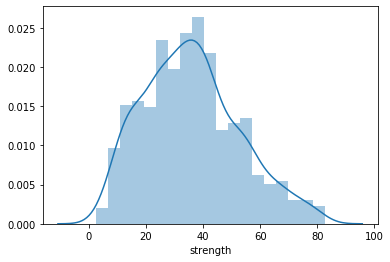

In [9]:
sb.distplot(data.strength)

from the above plot it is observed that the data is normal.

## Define X and y

In [10]:
X= data.iloc[:,:-1]
y=data.strength

In [11]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [12]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: strength, dtype: float64

## Scaling using StandardScalar

In [13]:
column_name=X.columns
X_scale=StandardScaler()
X=X_scale.fit_transform(X)
X=pd.DataFrame(X,columns=column_name)
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487


## splitting the data (train_test_split)

In [14]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=10)

## Modelling

### Linear Regression

In [15]:
model_concrete=LinearRegression()
model_concrete.fit(X_train,y_train)
y_predict=model_concrete.predict(X_test)

In [16]:
r2_score(y_test,y_predict)

0.6232763845604509

In [17]:
cv_score=cross_val_score(LinearRegression(),X,y,cv=5,scoring='r2')
cv_score

array([0.33015205, 0.41207076, 0.45175533, 0.60725028, 0.50374183])

##### r2_score obtained from Linear Regression model is little low so changing the model to SVM

# SVM

In [18]:
model=SVR()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [19]:
r2_score(y_test,y_predict)

0.6521766486226026

In [20]:
cv_score=cross_val_score(SVR(),X,y,cv=5,scoring='r2')
cv_score

array([0.14172103, 0.45898028, 0.50974069, 0.50121497, 0.07237454])

#### r2_score obtained from SVM model is little low so changing the model to XGBOOST

# XGBOOST


In [21]:
model=XGBRegressor()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [22]:
r2_score(y_test,y_predict)

0.936896713951996

In [23]:
cv_score=cross_val_score(XGBRegressor(),X,y,cv=10,scoring='r2')
cv_score

array([0.51458414, 0.73780853, 0.74805575, 0.58611929, 0.52439673,
       0.71594573, 0.89362329, 0.79512643, 0.95644796, 0.94774196])

In [24]:
print("Average_cv_score : ",np.mean(cv_score))
print("min_cv_score : ",min(cv_score))
print("max_cv_score : ",max(cv_score))

Average_cv_score :  0.7419849803009213
min_cv_score :  0.5145841385734597
max_cv_score :  0.95644796132279


## Defining the Parameters and grid

In [25]:
params={'n_estimators':[80,100,120],'learning_rate':[0.01,0.1,0.15,0.2], 'max_depth':[20,50,80,100],'gamma':[0.01,0.02,0.03,0.04,0.05]}
grid=RandomizedSearchCV(XGBRegressor(),params,scoring='r2',verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=120, max_depth=80, learning_rate=0.01, gamma=0.01 ..
[CV]  n_estimators=120, max_depth=80, learning_rate=0.01, gamma=0.01, total=   0.1s
[CV] n_estimators=120, max_depth=80, learning_rate=0.01, gamma=0.01 ..
[CV]  n_estimators=120, max_depth=80, learning_rate=0.01, gamma=0.01, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] n_estimators=120, max_depth=80, learning_rate=0.01, gamma=0.01 ..
[CV]  n_estimators=120, max_depth=80, learning_rate=0.01, gamma=0.01, total=   0.1s
[CV] n_estimators=120, max_depth=80, learning_rate=0.01, gamma=0.01 ..
[CV]  n_estimators=120, max_depth=80, learning_rate=0.01, gamma=0.01, total=   0.1s
[CV] n_estimators=120, max_depth=80, learning_rate=0.01, gamma=0.01 ..
[CV]  n_estimators=120, max_depth=80, learning_rate=0.01, gamma=0.01, total=   0.1s
[CV] n_estimators=80, max_depth=50, learning_rate=0.1, gamma=0.03 ....
[CV]  n_estimators=80, max_depth=50, learning_rate=0.1, gamma=0.03, total=   0.1s
[CV] n_estimators=80, max_depth=50, learning_rate=0.1, gamma=0.03 ....
[CV]  n_estimators=80, max_depth=50, learning_rate=0.1, gamma=0.03, total=   0.1s
[CV] n_estimators=80, max_depth=50, learning_rate=0.1, gamma=0.03 ....
[CV]  n_estimators=80, max_depth=50, learning_rate=0.1, gamma=0.03, total=   0.1s
[CV] n_estimators=80, max_depth=50, learning_rate=0.1, gamma=0.03 ....
[CV]

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.0s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate_parameters=None,
                        

In [26]:
grid.best_score_

0.8939668294729767

In [27]:
grid.best_params_

{'n_estimators': 120, 'max_depth': 100, 'learning_rate': 0.1, 'gamma': 0.05}

# Recreating model using best_params

In [28]:
model=XGBRegressor(n_estimators= 120, max_depth= 80, learning_rate=0.1, gamma=0.01)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)


In [29]:
r2_score(y_test,y_predict)

0.9281586633796942

#### since Xgboost has got 92.8% r2_score it can be selected as the best model to study the strength of cement concrete mixture.
#### while considering cv_score it ranges from 70% to 80% hence the model is not overfitted.